In [1]:
import pandas as pd
import pickle
import numpy as np
import re
from sklearn import linear_model


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
# 

import os

## Read Data

In [2]:
train=pd.read_csv(r'train.csv', parse_dates=['datetime'])
test=pd.read_csv(r'test.csv', parse_dates=['datetime'])

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train = train.drop(['casual','registered'],axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [6]:
def rmsle(y_log, y0_log):
    return np.sqrt(np.mean(np.square(y_log - y0_log)))



## Feature Engineering

In [7]:
# remove outlier
train = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 

In [8]:
for df in (train,test):
    
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hr'] = df['datetime'].dt.hour

    df['hr_categori'] = np.nan
    df.loc[(df.workingday == 1)&(df.hr <= 9)&(df.hr >= 7), 'hr_categori'] = "rush"
    df.loc[(df.workingday == 1)&(df.hr <= 19)&(df.hr >= 16), 'hr_categori'] = "rush"
    df.loc[(df.workingday == 1)&(df.hr < 16)&(df.hr > 9), 'hr_categori'] = "day"
    df.loc[(df.workingday == 1)&(df.hr < 7)|(df.hr > 19), 'hr_categori'] = "night"
  

#### Hour

/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


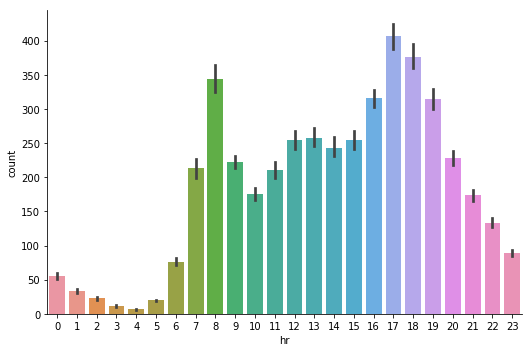

In [9]:
sns.factorplot(x="hr",y="count",data=train,kind='bar',size=5,aspect=1.5)

#### Month

/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


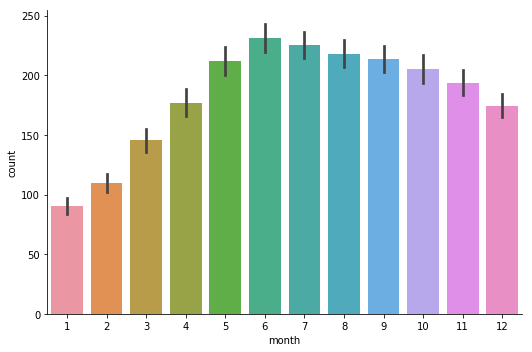

In [10]:
sns.factorplot(x="month",y="count",data=train,kind='bar',size=5,aspect=1.5)

#### Year

/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


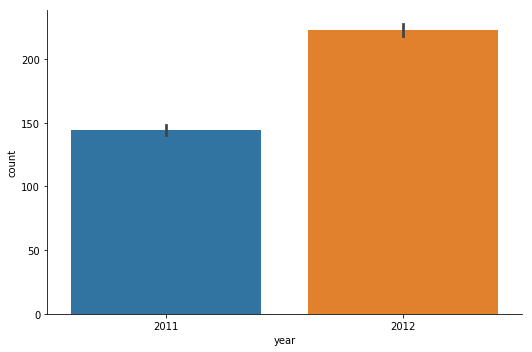

In [11]:
sns.factorplot(x="year",y="count",data=train,kind='bar',size=5,aspect=1.5)


#### Temp

/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


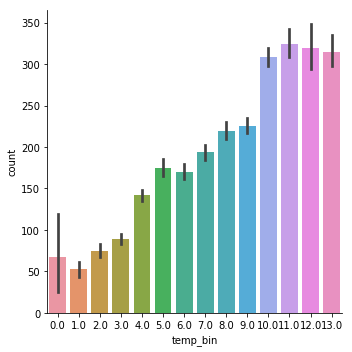

In [12]:
new_df=train.copy()

new_df['temp_bin']=np.floor(new_df['temp'])//3

sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

#### humidity

/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


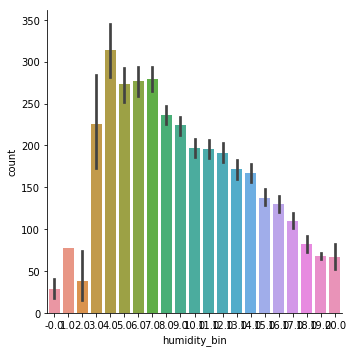

In [13]:
new_df=train.copy()

new_df['humidity_bin']=np.floor(new_df['humidity'])//5

sns.factorplot(x="humidity_bin",y="count",data=new_df,kind='bar')

In [14]:
for df in (train,test):
    
    df['humi_categori'] = np.nan
    df.loc[df.humidity < 15, 'humi_categori'] = 'low'
    df.loc[(df.humidity <= 85)&(df.humidity >= 15), 'humi_categori'] = 'normal'
    df.loc[(df.humidity >= 85), 'humi_categori'] = 'high'

  

#### Windspeed

In [15]:
train[train['windspeed']>=48]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hr,hr_categori,humi_categori
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.12,42,51.9987,5,2011,2,15,1,night,normal
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.97,16,50.0021,171,2011,2,19,15,NaN,normal
2755,2011-07-03 17:00:00,3,0,0,3,32.80,37.12,49,56.9969,358,2011,7,3,17,NaN,normal
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.12,49,56.9969,181,2011,7,3,18,NaN,normal


/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


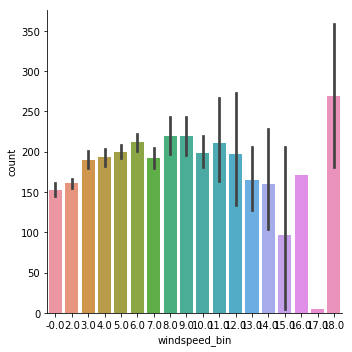

In [16]:
new_df=train.copy()

new_df['windspeed_bin']=np.floor(new_df['windspeed'])//3
sns.factorplot(x="windspeed_bin",y="count",data=new_df,kind='bar')

In [17]:
for df in (train,test):
    
    df['wind_categori'] = np.nan
    df.loc[df.windspeed < 15, 'wind_categori'] = 'normal'
    df.loc[(df.windspeed >= 50), 'wind_categori'] = 'high'


In [18]:
weather_train = pd.get_dummies(train['weather'], prefix='wea', prefix_sep='_')
weather_test = pd.get_dummies(test['weather'], prefix='wea', prefix_sep='_')

season_train = pd.get_dummies(train['season'], prefix='sea', prefix_sep='_')
season_test = pd.get_dummies(test['season'], prefix='sea', prefix_sep='_')

year_train = pd.get_dummies(train['year'], prefix='year', prefix_sep='_')
year_test = pd.get_dummies(test['year'], prefix='year', prefix_sep='_')

wind_categori_train = pd.get_dummies(train['wind_categori'], prefix='wind_cate', prefix_sep='_')
wind_categori_test = pd.get_dummies(test['wind_categori'], prefix='wind_cate', prefix_sep='_')

humi_categori_train = pd.get_dummies(train['humi_categori'], prefix='humi_cate', prefix_sep='_')
humi_categori_test = pd.get_dummies(test['humi_categori'], prefix='humi_cate', prefix_sep='_')

hr_categori_train = pd.get_dummies(train['hr_categori'], prefix='hr_cate', prefix_sep='_')
hr_categori_test = pd.get_dummies(test['hr_categori'], prefix='hr_cate', prefix_sep='_')

In [19]:
Train_Master = pd.concat([train,
                          weather_train,
                          season_train,
                          year_train,
                          wind_categori_train,
                          humi_categori_train,
                          hr_categori_train
                         ], axis=1)

In [20]:
Test_Master = pd.concat([test,
                          weather_test,
                          season_test,
                          year_test,
                          wind_categori_test,
                          humi_categori_test,
                          hr_categori_test
                         ], axis=1)

In [21]:
# Train_Master = Train_Master.drop(['weather','season','datetime','year','month','hr','hr_categori'], axis = 1)
# Test_Master = Test_Master.drop(['weather','season','datetime','year','month','hr','hr_categori'], axis = 1)

Train_Master = Train_Master.drop(['weather','season','year','datetime','hr_categori','humi_categori','wind_categori'], axis = 1)
Test_Master = Test_Master.drop(['weather','season','year','datetime','hr_categori','humi_categori','wind_categori'], axis = 1)

Train, Test = train_test_split(Train_Master, test_size = 0.3)

In [22]:

X_train = Train.drop(['count'], axis=1)
Y_train = Train['count']
Y_train_log = Train['count'].apply(lambda x:np.log1p(x))

X_test = Test.drop(['count'], axis=1)
Y_test = Test["count"]
Y_test_log = Test["count"].apply(lambda x:np.log1p(x))

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

## auto tuning

In [23]:
def lasso_autotune(X,y):
	
	param_test = {
	 'max_iter':[5000],
	 'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100, 500, 1000]
	}

	gsearch = GridSearchCV(Lasso(fit_intercept=True, normalize=True, selection='random'),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune lasso')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [24]:
def ridge_autotune(X,y):
	
	param_test = {
	 'max_iter':[5000],        
	 'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100],
	 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
	}

	gsearch = GridSearchCV(Ridge(),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune ridge')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [25]:
def svr_autotune(X,y):

	param_test = {
	 'kernel':['rbf','linear','sigmoid'],
	 'gamma':np.logspace(-7, 2, 3),
	 'epsilon':[0.1,0.3,0.5],
	 'C':np.logspace(-2, 7, 3),
	}

	gsearch = GridSearchCV(SVR(),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune svr')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [26]:
def random_forest_autotune(X,y):

	param_test = {
	 'max_depth':[9,13,17],
	 'max_features':['auto','sqrt'],
	 'n_estimators': [500,1000,1500]
	}

	gsearch = GridSearchCV(RandomForestRegressor(),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune random forest')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [27]:
def xgb_autotune(X,y):
	param = {
	        'objective':'reg:linear',
	        'n_estimators':1000,
	        'learning_rate':0.05,
	        'gamma':0,
	        'max_depth':5,
	        'min_child_weight':1,
	        'colsample_bytree':0.5,
	        'subsample': 0.8, 
	        'verbose':1,
	        'reg_alpha':0}


	param_test1 = {
	 'max_depth':[7,13,15],
	 'reg_alpha':[0.1,1,10,100],
	 'learning_rate':[0.05,0.1],
	}

	gsearch = GridSearchCV(xgb.XGBRegressor(objective=param['objective'],
	                          n_estimators=param['n_estimators'], learning_rate = param['learning_rate'], gamma=param['gamma'],
	                          colsample_bytree=param['colsample_bytree'], subsample=param['subsample'], reg_alpha=param['reg_alpha']
	                          ),
	                        param_grid = param_test1, scoring='neg_mean_squared_error',iid=False, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune max_depth, min_child_weight')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))
	return gsearch.best_estimator_
    

In [28]:
lasso_param = lasso_autotune(X_train,Y_train_log)
ridge_param = ridge_autotune(X_train,Y_train_log)
xgb_param = xgb_autotune(X_train,Y_train_log)
random_forest_param = random_forest_autotune(X_train,Y_train_log)
# svr_param = svr_autotune(X_train,Y_train_log)







/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


____________________________________________
tune lasso
____________________________________________
{'mean_fit_time': array([0.23954229, 0.35880594, 0.02012081, 0.00267525, 0.00244064,
       0.00254898, 0.002531  , 0.00268974, 0.00279455, 0.00295563]), 'std_fit_time': array([6.97213144e-02, 1.95965009e-01, 5.61406629e-03, 1.77923235e-04,
       3.71380542e-05, 8.84949131e-05, 9.52915128e-05, 2.00548469e-04,
       3.99732519e-04, 5.05547050e-04]), 'mean_score_time': array([0.00104346, 0.00115185, 0.00093083, 0.00071635, 0.00066319,
       0.00065904, 0.00072622, 0.00074863, 0.00076327, 0.00077939]), 'std_score_time': array([1.89885010e-04, 2.14886939e-04, 1.91453735e-04, 5.58456729e-05,
       3.45516481e-05, 3.79977885e-05, 6.79376659e-05, 6.46187366e-05,
       1.00251154e-04, 1.29373312e-04]), 'param_alpha': masked_array(data=[1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10, 100, 500, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, 

/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.237725e-17
  overwrite_a=True).T
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.212934e-17
  overwrite_a=True).T
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.207533e-17
  overwrite_a=True).T
/Users/pan/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Recipr

____________________________________________
tune ridge
____________________________________________
{'mean_fit_time': array([0.00408974, 0.0062438 , 0.00318604, 0.00440216, 0.00393162,
       0.29391961, 0.16629162, 0.0025878 , 0.00492492, 0.00285358,
       0.00429854, 0.0037519 , 0.28429494, 0.16998439, 0.00254083,
       0.00482063, 0.00229187, 0.00332823, 0.0029532 , 0.2900207 ,
       0.18762546, 0.00257673, 0.00526071, 0.00282617, 0.00438294,
       0.00457268, 0.29303317, 0.17941241, 0.00255632, 0.00472689,
       0.00238495, 0.00367203, 0.00309567, 0.26990318, 0.16005197,
       0.00228872, 0.00419102, 0.00223598, 0.00375347, 0.00365086,
       0.24192271, 0.14378724, 0.00251212, 0.00453296, 0.00260725,
       0.00445552, 0.00380774, 0.20692286, 0.13955402, 0.00276752,
       0.00560083, 0.00294914, 0.00438099, 0.00375156, 0.06134315,
       0.07257442]), 'std_fit_time': array([2.70547509e-03, 2.51678453e-03, 5.00030265e-04, 4.32991640e-04,
       7.50900571e-04, 1.15521722e-0

____________________________________________
tune max_depth, min_child_weight
____________________________________________
{'mean_fit_time': array([ 7.83053346,  7.58256807,  6.3053874 ,  3.4643137 , 12.72762899,
       11.05516286,  7.05578156,  3.43552051, 13.55146155, 11.37484193,
        7.4054316 ,  3.60085063,  7.73346343,  7.644801  ,  5.9358367 ,
        3.09859052, 11.8231029 , 10.31994081,  6.49004979,  3.15434036,
       12.24142265, 10.63311329,  6.45304561,  3.10379224]), 'std_fit_time': array([0.12171082, 0.07423892, 0.06742247, 0.03019561, 0.07725721,
       0.05877315, 0.0899014 , 0.04099213, 0.08481735, 0.05224672,
       0.20479703, 0.0937078 , 0.17772051, 0.16818113, 0.0549796 ,
       0.02859565, 0.05121151, 0.03045357, 0.05599969, 0.07281904,
       0.10774904, 0.17977309, 0.07101277, 0.0270395 ]), 'mean_score_time': array([0.11966438, 0.1105979 , 0.07144108, 0.01676402, 0.32561226,
       0.15838475, 0.07687321, 0.01733928, 0.3449913 , 0.1568408 ,
       0.0841696

0.14435047831870745
____________________________________________
tune random forest
____________________________________________
{'mean_fit_time': array([ 4.23531756,  8.51433387, 12.85072136,  1.11652594,  2.20994949,
        3.33032341,  6.40223703, 12.86727176, 19.25766106,  1.74153047,
        3.50680623,  5.40532899,  8.22088604, 16.09209247, 23.43320146,
        2.24910789,  4.4891088 ,  6.77274857]), 'std_fit_time': array([0.03012698, 0.02483256, 0.16124494, 0.00447837, 0.01406669,
       0.034574  , 0.0527242 , 0.06660202, 0.12969029, 0.01676959,
       0.02215257, 0.10253297, 0.10923214, 0.59174111, 0.12952089,
       0.0522095 , 0.04361097, 0.05272064]), 'mean_score_time': array([0.05917449, 0.11596041, 0.18938909, 0.06562376, 0.1294663 ,
       0.18163648, 0.09740314, 0.2038866 , 0.31740332, 0.09810705,
       0.20597239, 0.32981091, 0.18604259, 0.33245568, 0.50497189,
       0.17196655, 0.34807258, 0.52078519]), 'std_score_time': array([0.00266145, 0.00202145, 0.01838772, 0

In [29]:
model_names=['lasso','ridge','xgb','random forest']#,'svr']
rmsles=[]


print('='*15)
print('lasso test score')
rmsles.append(rmsle(lasso_param.predict(X_test),Y_test_log))
print(rmsle(lasso_param.predict(X_test),Y_test_log))
print('='*15)

print('='*15)
print('ridge test score')
rmsles.append(rmsle(lasso_param.predict(X_test),Y_test_log))
print(rmsle(ridge_param.predict(X_test),Y_test_log))
print('='*15)

print('='*15)
print('xgb test score')
rmsles.append(rmsle(lasso_param.predict(X_test),Y_test_log))
print(rmsle(xgb_param.predict(X_test),Y_test_log))
print('='*15)

print('='*15)
print('random forest test score')
rmsles.append(rmsle(lasso_param.predict(X_test),Y_test_log))
print(rmsle(random_forest_param.predict(X_test),Y_test_log))
print('='*15)

# print('='*15)
# print('svr test score')
# rmsles.append(rmsle(lasso_param.predict(X_test),Y_test_log))
# print(rmsle(svr_param.predict(X_test),Y_test_log))
# print('='*15)

d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

lasso test score
0.7799878917321763
ridge test score
0.7800124947210075
xgb test score
0.29185460390972295
random forest test score
0.3240618634563925


{'Modelling Algo': ['lasso', 'ridge', 'xgb', 'random forest'],
 'RMSLE': <function __main__.rmsle(y_log, y0_log)>}

In [30]:
predict_met = pd.DataFrame(data={method: [np.nan] * X_train.shape[0] for method in ['lasso', 'ridge', 
                                                                                  'xgb', 'random forest',
                                                                                  #'svr'
                                                                                   ]})

In [31]:
predict_met['lasso'] = lasso_param.predict(X_train)
predict_met['ridge'] = ridge_param.predict(X_train)
predict_met['xgb'] = xgb_param.predict(X_train)
predict_met['random forest'] = random_forest_param.predict(X_train)
#predict_met['svr'] = svr_param.predict(X_train)

predict_met.head()

,lasso,ridge,xgb,random forest
0,2.436318,2.436488,1.668800,1.857588
1,4.767600,4.767640,5.307631,5.360706
2,3.174975,3.175453,2.553365,2.427609
3,2.760753,2.761532,1.520681,1.436356
4,5.027744,5.027588,5.899062,5.885033


In [32]:
ensenble_xgb = xgb_autotune(predict_met,Y_train_log)

____________________________________________
tune max_depth, min_child_weight
____________________________________________
{'mean_fit_time': array([2.56837239, 2.61273012, 1.45465903, 0.97314219, 4.49734621,
       3.53732262, 1.43310552, 0.98631725, 4.93145199, 3.63742723,
       1.43693132, 0.97589312, 2.5996521 , 2.62953639, 1.29188266,
       0.92691274, 4.37175488, 3.50670767, 1.30102773, 0.91508751,
       4.85160837, 3.85227861, 1.54825935, 0.98770518]), 'std_fit_time': array([0.04365785, 0.02172272, 0.0294601 , 0.01042971, 0.0391946 ,
       0.03421407, 0.02489516, 0.01803238, 0.06736036, 0.04231188,
       0.04669127, 0.01461266, 0.02606882, 0.03228285, 0.01508851,
       0.02016649, 0.01536453, 0.05338716, 0.02599327, 0.00851488,
       0.25095931, 0.17896995, 0.10645099, 0.00667144]), 'mean_score_time': array([0.0737186 , 0.08341036, 0.03294816, 0.01014242, 0.20813313,
       0.12027521, 0.03379188, 0.01020517, 0.25178976, 0.11990924,
       0.03430471, 0.01051903, 0.0783382

0.08864044209308107


In [33]:
test_met = pd.DataFrame(data={method: [np.nan] * X_test.shape[0] for method in ['lasso', 'ridge', 
                                                                                  'xgb', 'random forest',
                                                                                  #'svr'
                                                                               ]})
test_met['lasso'] = lasso_param.predict(X_test)
test_met['ridge'] = ridge_param.predict(X_test)
test_met['xgb'] = xgb_param.predict(X_test)
test_met['random forest'] = random_forest_param.predict(X_test)
#test_met['svr'] = svr_param.predict(X_test)
                        
                        

In [34]:
print('='*15)
print('outer layer test score')
print(rmsle(ensenble_xgb.predict(test_met),Y_test_log))
print('='*15)

outer layer test score
0.30647043445180083


In [46]:
Test_Master['humi_cate_low'] = 0
Test_Master = Test_Master[X_train.columns]

In [47]:
result_met = pd.DataFrame(data={method: [np.nan] * Test_Master.shape[0] for method in ['lasso', 'ridge', 
                                                                                  'xgb', 'random forest',
                                                                                  #'svr'
                                                                                      ]})
result_met['lasso'] = lasso_param.predict(Test_Master)
result_met['ridge'] = ridge_param.predict(Test_Master)
result_met['xgb'] = xgb_param.predict(Test_Master)
result_met['random forest'] = random_forest_param.predict(Test_Master)
#result_met['svr'] = svr_param.predict(Test_Master)
                        
result_met.head()                     

,lasso,ridge,xgb,random forest
0,1.709720,1.709956,2.408498,2.371457
1,1.934121,1.934163,1.753835,1.879350
2,2.036950,2.036985,1.345422,1.444652
3,2.079944,2.080051,1.151324,1.405032
4,2.182772,2.182873,0.908375,1.226617


In [48]:
pred_log = ensenble_xgb.predict(result_met)
pred = np.expm1(pred_log)

submission={'datetime':test['datetime'],'count':pred}
submission = pd.DataFrame(submission)

submission['count'] = submission.apply(lambda x : 1 if (x['count'] <= 0) else x['count'], axis = 1)
submission.to_csv("submission.csv", index=False)
